# 2.1 二元变量
本书的第2章主要介绍了常见的概率分布以及它们的性质，这些分布之所以重要是因为它们是复杂模型的主要构件，同时也为后续学习统计学中的一些关键概念（如贝叶斯推断、变分推断、概率图模型等）作铺垫。我们研究概率分布，其中有一个重要的应用就是根据一组数据$\mathcal{D}=\{\mathsf{x}_1,\mathsf{x}_2,...,\mathsf{x}_N\}$来推测随机变量$\mathsf{x}$的真实分布，这个过程称为密度估计（density estimation）。密度估计是一个ill-posed的问题，因为任何满足在$\{\mathsf{x}_1,\mathsf{x}_2,...,\mathsf{x}_N\}$上概率大于0的分布都是一个可能的候选，而从中选择一个合适的分布有助于我们进行模型选择。

密度估计方法一般可以分为两种：  
1.参数化方法  
这类方法的特点是分布的形式由一个或多个参数决定，比如高斯分布的形状取决于均值和标准差。参数化方法分为两大流派：
* 频率学派：  
频率学派认为参数是已知的定值，通过求解一个目标函数（如最大似然）来估计参数值；  
* 贝叶斯学派：  
贝叶斯学派认为参数是随机变量，首先假设参数服从一个先验分布，接着通过收集到的数据来修正先验分布，得到后验分布  

2.非参数化方法  
参数化方法的缺点是当假设的分布形式不符合实际数据的分布时，效果会很差。因此有学者提出了非参数方法，这类方法的特点是分布的形式不依赖于特定的参数，而是依赖于数据集的大小。但需要注意的是，“非参”并不意味着这类模型没有参数，它与参数化方法的区别在于，它的参数控制的不是分布的形式，而是模型的复杂度。  
非参数方法主要代表有k近邻、非参数贝叶斯等。

## 伯努利分布
我们首先考虑一个二元随机变量$x\in\{0,1\}$，可以将其理解为投掷一次硬币的结果，如果出现正面则$x=1$，出现反面则$x=0$。我们进一步假设这枚硬币是不均匀的，那么$x=1$的概率可以由参数$\mu$来表示
$$p(x=1|\mu)=\mu$$
其中$0\leq \mu \leq 1$，从中可以得出$p(x=0|\mu)=1-\mu$。那么关于$x$的分布可以写为如下形式：
$$ p(x|\mu)=\mu^x(1-\mu)^{1-x}$$
这个分布称为伯努利分布。可以验证其均值和方差分别为
$$\mathbb{E}[x]=\mu*1+(1-\mu)*0=\mu\\ var[x]=\mathbb{E}[x^2]-\mathbb{E}^2[x]=\mu(1-\mu)$$


## 二项式分布

伯努利分布只考虑了一个二元变量的情况（即$N$只能等于1），然而只进行一次实验通常是无法准确估计参数的。如果我们放宽对于$N$的限制，进行$N$次独立重复实验，通过这$N$次实验的结果来更精确地估计$\mu$的值。记$\{x_1,x_2,...,x_N\}$为$N$次实验的结果对应的随机变量集合，$\mathcal{D}=\{\mathsf{x}_1,\mathsf{x}_2,...,\mathsf{x}_N\}$为实验获得的观测值，我们希望从中估计出参数$\mu$的值从而确定$x$的分布。在此之前，我们应假定这组样本是独立同分布产生，在此假设下$x=1$的总次数$m=\sum_{i=1}^N x_i$服从二项式分布（binomial distribution）：
$$ p(m|N,\mu)=\binom N m \mu^m(1-\mu)^{N-m}$$
其中$\binom N m=\frac{N!}{(N-m)!m!}$  
其均值，方差分别为
$$ \mathbb{E}[m]=\sum_{m=0}^N m p(m|N,\mu) = N\mu\\ var[m]=\sum_{m=0}^N (m-\mathbb{E}[m])^2 p(m|N,\mu)=N\mu(1-\mu)$$
简单证明一下这两个结论：  
1）$\mathbb{E}[m]= N\mu$  
证：  
$$\begin{aligned}\mathbb{E}[m]&=\sum_{m=0}^N m p(m|N,\mu) \\&=\sum_{m=0}^N m \frac{N!}{(N-m)!m!}\mu^m(1-\mu)^{N-m}\\&=0+\sum_{m=1}^N m \frac{N!}{(N-m)!m!}\mu^m(1-\mu)^{N-m}\\&=N\mu\sum_{m=1}^N\frac{(N-1)!}{(N-m)!(m-1)!}\mu^{m-1}(1-\mu)^{N-m}\\&=N\mu\sum_{k=0}^{N-1}\frac{(N-1)!}{(N-k-1)!k!}\mu^k(1-\mu)^{N-k-1}\\&=N\mu(\mu+1-\mu)^{N-1}=N\mu\end{aligned}$$
2）$var[m]=N\mu(1-\mu)$  
证：  
$$\begin{aligned}var[m]&=\mathbb{E}[m^2]-\mathbb{E}^2[m]\\&=\sum_{m=0}^N m^2 \frac{N!}{(N-m)!m!}\mu^m(1-\mu)^{N-m}-N^2\mu^2\\&=\sum_{m=1}^N m \frac{N!}{(N-m)!(m-1)!}\mu^m(1-\mu)^{N-m}-N^2\mu^2\\&=\sum_{m=1}^N [(m-1)+1] \frac{N!}{(N-m)!(m-1)!}\mu^m(1-\mu)^{N-m}-N^2\mu^2\\&=N(N-1)\mu^2\sum_{m=2}^N\frac{(N-2)!}{(N-m)!(m-2)!}\mu^{m-2}(1-\mu)^{N-m}+N\mu\sum_{m=1}^N \frac{(N-1)!}{(N-m)!(m-1)!}\mu^{m-1}(1-\mu)^{N-m}-N^2\mu^2\\&=N(N-1)\mu^2[\mu+(1-\mu)]^{N-2}+N\mu[\mu+(1-\mu)]^{N-1}-N^2\mu^2\\&=N^2\mu^2-N\mu^2+N\mu-N^2\mu^2=N\mu-N\mu^2=N\mu(1-\mu)\end{aligned}$$

实际上，练习1.10的结论告诉我们：对于一组独立随机变量之和$z=x_1+x_2+...+x_N$，$z$的均值等于这组随机变量的均值之和$\sum_{i=1}^N mean(x_i)$，$z$的方差等于$\sum_{i=1}^N var(x_i)$。利用这个结论，我们可以很轻易地得出上面的结论。  

按照频率学派的观点，我们可以通过最大似然法来求解$\mu$的值。由独立同分布假设，我们可以将这组数据关于$\mu$的条件概率（也称为关于$\mu$的似然函数）写为
$$L(\mu)=p(\mathcal{D}|\mu)=\prod_{i=1}^N p(x_i|\mu)$$
为了方便后续的求导，我们对似然函数取对数，得到对数似然函数：
$$\mu_{ML}=\arg\max_{\mu}=\mathcal{L}(\mu)=\log L(\mu)=\sum_{i=1}^N \log p(x_i|\mu)=\sum_{i=1}^N [x_i\log (\mu)+(1-x_i)\log(1-\mu)]$$
最大化对数似然等价于最小化一个负对数似然损失函数（negative log-likelihood，nll）
$$\mu_{ML}=\arg\min_{\mu}=-\sum_{i=1}^N \log p(x_i|\mu)=-\sum_{i=1}^N [x_i\log (\mu)+(1-x_i)\log(1-\mu)]$$

注意到方括号里的项有些类似二元交叉熵（实际上交叉熵就是从最大似然目标函数推出来的），我们可以将其理解为$\mu$在每个点$x_i$上的损失，如果$x_i=1$，则损失取决于前一项，当$\mu$越接近于1，这种损失就越小，而当$\mu$越接近与0，损失就越大；而如果$x_i=0$，情况则相反。负对数似然损失函数反映了$\mu$的某一个特定取值在样本集上的平均损失，最小化nll损失函数等价于寻找使得整体损失最小的参数值。  
我们将nll函数的导数设为0，可以得到参数的极大似然估计：
$$\mu_{ML}=\frac{1}{N}\sum_{i=1}^N x_i$$
也就是样本均值（sample mean）。如果我们把$x_i=1$的次数记为$m$，那么$\mu_{ML}=\frac{m}{N}$  


## beta分布
最大似然方法在统计推断中应用广泛，然而它也存在一个致命的缺陷。举个例子来说，假设我们连续地投掷一枚硬币3次，结果都是正面朝上，那么根据MLE，这枚硬币出现正面的概率就一定是$\mu=1$，这显然是违背直觉的，出现这种情况的原因在于MLE在小数据集上容易发生过拟合。  
为了解决MLE容易过拟合的问题，有统计学家提出了贝叶斯方法。贝叶斯学派认为参数不是定值，而是具有不确定性的随机数，比如投掷10次硬币，其中正面出现了6次，那么贝叶斯派认为$\mu$的值不一定是0.6，而是有可能大于0.6，也可能小于0.6，只不过概率稍低一些。为此他们还引入了先验分布来刻画参数的不确定性，先验在一定程度上反映了观测者对于参数的最初认知，如何选取合适的先验分布是一门学问，通常的做法是结合领域知识来进行初始化；在先验分布的基础上，通过不断收集数据，参数的不确定性发生了改变，在此过程中我们更正对于参数的置信度，由此得到了后验分布。这个过程可以用贝叶斯公式来表示：  
$$p(\mathbf{w}|\mathcal{D})=\frac{p(\mathcal{D}|\mathbf{w})p(\mathbf{w})}{p(\mathcal{D})}$$
其中$\mathbf{w}$表示分布的参数，$\mathcal{D}$表示我们收集到的数据。    
回到文章主题，在伯努利分布和二项式分布中，似然函数表现为$\mu^x(1-\mu)^{1-x}$乘以某个常数的形式，这启发我们，如果我们在为$\mu$选择先验时，使其与$\mu$的幂以及$(1-\mu)$的幂成正比，那么后验分布将具有与先验分布相同的函数形式。这个性质称为共轭（conjugacy），而满足这个性质的先验被称为共轭先验（conjugate prior）。特别地，我们选择beta分布作为二项式分布的共轭先验，其表达式如下：
$$ Beta(\mu|a,b)=\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1}=\frac{1}{Beta(a,b)}\mu^{a-1}(1-\mu)^{b-1}$$
其中$\Gamma(x)$是伽马函数，$Beta(a,b)=\frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)}$，上式的系数保证了beta分布是归一化的，即
$$\int_0^1 Beta(\mu|a,b)d\mu=1$$
注意到beta分布是关于二项分布参数$p(x_i=1|\mu)=\mu$的参数，因此定义域为$[0,1]$。  
Beta分布的均值、方差分别为：
$$\mathbb{E}[\mu]=\frac{a}{a+b}\\ var[\mu]=\frac{ab}{(a+b)^2(a+b+1)}$$
简单证明一下。  
1）$\mathbb{E}[\mu]=\frac{a}{a+b}$  
证：  
$$\begin{aligned}\mathbb{E}[\mu]&=\int_0^1 \mu \frac{1}{Beta(a,b)}\mu^{a-1}(1-\mu)^{b-1}\\&=\frac{1}{Beta(a,b)}\int_0^1 \mu^{a}(1-\mu)^{b-1}\\&=\frac{Beta(a+1,b)}{Beta(a,b)}\\&=\frac{\frac{\Gamma(a+1)\Gamma(b)}{\Gamma(a+b+1)}}{\frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)}}=\frac{\Gamma(a+1)\Gamma(a+b)}{\Gamma(a)\Gamma(a+b+1)}\\&=\frac{a\Gamma(a)\Gamma(a+b)}{(a+b)\Gamma(a)\Gamma(a+b)}=\frac{a}{a+b}\end{aligned}$$
2）$var[\mu]=\frac{ab}{(a+b)^2(a+b+1)}$  
证：  
$$\begin{aligned}var[\mu]&=\mathbb{E}[m^2]-\mathbb{E}^2[m]\\&=\frac{1}{Beta(a,b)}\int_0^1\mu^{a+1}(1-\mu)^{b-1}d\mu-\big(\frac{a}{a+b}\big)^2\\&=\frac{Beta(a+2,b)}{Beta(a,b)}-\frac{a^2}{(a+b)^2}\\&=\frac{\frac{\Gamma(a+2)\Gamma(b)}{\Gamma(a+b+2)}}{\frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)}}-\frac{a^2}{(a+b)^2}\\&=\frac{a(a+1)\Gamma(a)\Gamma(a+b)}{(a+b)(a+b+1)\Gamma(a)\Gamma(a+b)}-\frac{a^2}{(a+b)^2}\\&=\frac{(a^2+a)(a+b)-a^2(a+b+1)}{(a+b)^2(a+b+1)}\\&=\frac{a^3+a^2b+a^2+ab-a^3-a^2b-a^2}{(a+b)^2(a+b+1)}\\&=\frac{ab}{(a+b)^2(a+b+1)}\end{aligned}$$
我们把$a,b$叫作$\mu$的超参数（hyperparameter），因为它们决定了$\mu$的分布。有时我们也把它们称为形状参数（shape parameter），下图展示了它们是如何控制beta分布的形状的

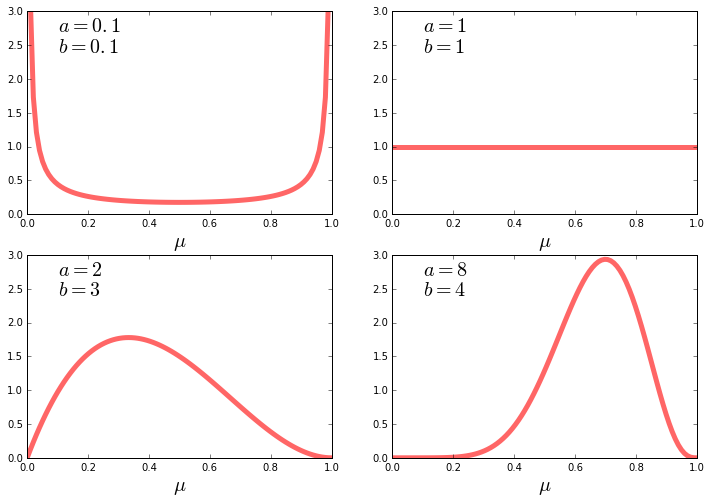

In [1]:
%matplotlib inline
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

params = [(.1,.1), (1,1), (2,3), (8,4)]

x = np.linspace(0, 1, 100)
fig, axes = plt.subplots(2, 2, figsize=(12,8))
axes = np.ravel(axes)
for i, ax in enumerate(axes):
    a, b = params[i][0], params[i][1]
    ax.plot(x, beta.pdf(x, a, b), 'r-', lw=5, alpha=0.6, label='beta pdf')
    ax.set_ylim(0,3)
    ax.set_xlabel('$\mu$', fontsize=20)
    ax.text(0.1, 2.7, '$a={}$'.format(a), size=20)
    ax.text(0.1, 2.4, '$b={}$'.format(b), size=20)
plt.show()

下面我来说明为什么beta分布是二项分布参数的共轭先验。  
假设二项分布的$N$次独立实验中，事件发生（$x=1$）的次数为$m_1$，未发生（$x=0$）的次数为$m_2$，且$m_1+m_2=N$。那么似然函数可以表示为：
$$count(m_1,m_2)=\binom {m_1+m_2} {m_2}\mu^{m_1}(1-\mu)^{m_2}$$
依据贝叶斯公式，后验概率分布可以写成
$$\begin{aligned}p(\mu|m_1,m_2)&=\frac{\frac{1}{Beta(a,b)}\mu^{a-1}(1-\mu)^{b-1}\cdot \binom {m_1+m_2} {m_2}\mu^{m_1}(1-\mu)^{m_2}}{\int_0^1 \frac{1}{Beta(a,b)}\mu^{a-1}(1-\mu)^{b-1}\cdot \binom {m_1+m_2} {m_2}\mu^{m_1}(1-\mu)^{m_2}d\mu} \\&=\frac{\frac{1}{Beta(a,b)}\mu^{a+m_1-1}(1-\mu)^{b+m_2-1}}{\frac{Beta(a+m_1,b+m_2)}{Beta(a,b)}\int_0^1 \frac{1}{Beta(a+m_1,b+m_2)}\mu^{a+m_1-1}(1-\mu)^{b+m_2-1}d\mu}\\&=\frac{1}{Beta(a+m_1,b+m_2)}\mu^{a+m_1-1}(1-\mu)^{b+m_2-1}\\&=Beta(\mu|a+m_1,b+m_2) \end{aligned}$$
至此，证明了后验分布也是一个beta分布。也许推导的公式有点难懂，我们可以从另一个更直观的角度来理解。  
$$Beta(\mu|a,b)\times count(m_1,m_2)=Beta(\mu|a+m_1,b+m_2)$$
我们发现，从先验转变到后验的过程中，观测数据的作用相当于将$a$增加到$a+m_1$，将$b$增加到$b+m_2$。那么，我们可以认为beta分布的两个超参数$a$和$b$分别代表$x=1$和$x=0$的伪计数（因为它们可以是实数）。我们可以将这个过程简单地表达为：  
><center>伪计数+真实计数=总计数<center/>  

共轭性质使得贝叶斯框架天然具有学习序列数据的能力。举个例子来说，假设先验分布为$Beta(a_0,b_0)$，在$t=1$时刻观测到的数据集记为$\mathcal{D}_1$，那么我们可以根据$\mathcal{D}_1$修正先验为后验$Beta(a_1,b_1)$。在$t=2$时，我们可以利用上一轮的后验$Beta(a_1,b_1)$作为本轮的先验，通过观测集$\mathcal{D}_2$得到后验$Beta(a_2,b_2)$，以此类推。这么做的好处如下：  
1）可以在无法获取完整数据的情况下进行学习，在线更新参数  
2）具有良好的扩展性，很容易处理较大规模的数据集  

如果我们的目标是给定观测数据集，预测下一次实验的观测值，根据求和公式和乘法公式，有
$$ p(x=1|\mathcal{D})=\int_0^1 p(x=1|\mu)p(\mu|\mathcal{D})d\mu = \int_0^1 \mu p(\mu|\mathcal{D})d\mu =\mathbb{E}[\mu|\mathcal{D}]$$
我们来求解上式：
$$\begin{aligned}\mathbb{E}[\mu|\mathcal{D}]&=\int_0^1 \mu p(\mu|\mathcal{D})d\mu\\&=\frac{1}{Beta(a+m_1,b+m_2)}\int_0^1 \mu^{a+m_1}(1-\mu)^{b+m_2-1}\\&=\frac{Beta(a+m_1+1,b+m_2)}{Beta(a+m_1,b+m_2)}\\&=\frac{\Gamma(a+m_1+1)\Gamma(b+m_2)}{\Gamma(a+b+m_1+m_2+1)}\cdot\frac{\Gamma(a+b+m_1+m_2)}{\Gamma(a+m_1)\Gamma(b+m_2)}\\&=\frac{(a+m_1)\Gamma(a+m_1)\Gamma(b+m_2)}{(a+b+m_1+m_2)\Gamma(a+b+m_1+m_2)}\cdot\frac{\Gamma(a+b+m_1+m_2)}{\Gamma(a+m_1)\Gamma(b+m_2)}\\&=\frac{a+m_1}{a+b+m_1+m_2}\end{aligned}$$

上式可以简单解释为$x=1$的样本数和占总样本数的比例（先验的有效样本数与观测集的真实样本数之和）。我们可以证明$\mu$的后验均值一定处于先验均值和极大似然估计之间，且二者的次序取决于$am_1-bm_2$的符号。  
证明：  
首先考察先验均值
$$\begin{aligned}\frac{a+m_1}{a+b+m_1+m_2}-\frac{a}{a+b}&=\frac{(a+m_1)(a+b)-a(a+b+m_1+m_2)}{(a+b+m_1+m_2)(a+b)}\\&=\frac{bm_1-am_2}{(a+b+m_1+m_2)(a+b)}\end{aligned}$$
接着考察极大似然估计
$$\begin{aligned}\frac{a+m_1}{a+b+m_1+m_2}-\frac{m_1}{m_1+m_2}&=\frac{(a+m_1)(m_1+m_2)-m_1(a+b+m_1+m_2)}{(a+b+m_1+m_2)(m_1+m_2)}\\&=\frac{am_2-bm_1}{(a+b+m_1+m_2)(m_1+m_2)}\end{aligned}$$
1）如果$am_2-bm_1>0$，则
$$\mu_{ML}<\mathbb{E}[\mu|\mathcal{D}]<\mathbb{E}[\mu]$$
2）如果$am_2-bm_1<0$，则
$$\mathbb{E}[\mu]<\mathbb{E}[\mu|\mathcal{D}]<\mu_{ML}$$
3）如果$am_2-bm_1=0$，则
$$\mu_{ML}=\mathbb{E}[\mu|\mathcal{D}]=\mathbb{E}[\mu]$$
当$m_1,m_2\to\infty$时，$a,b$可以忽略不计，那么后验均值的极限将趋近于
$$\frac{m_1}{m_1+m_2}$$
也就是$\mu$的极大似然估计。这说明了贝叶斯后验估计最终将收敛于极大似然估计。